# practice 1. 단순 선형 회귀와 R square

다이아몬드 데이터 셋에서 독립 변수를 하나 선택하여 가격을 예측하는 선형 회귀 모델을 만들어보세요. 독립 변수를 바꿔가면서 모델을 학습시켜 보고, r square 값을 비교해보세요. 그리고 독립변수나 종속 변수에 로그를 씌워주는 등의 전처리를 한 뒤, 모델을 학습시킨 다음 결과를 비교해보세요.

In [66]:
from utils import load_diamonds_dataset

x_train, x_test, y_train, y_test = load_diamonds_dataset()

In [67]:
x_train

,carat,cut,color,clarity,depth,table,x,y,z
5463,1.23,Very Good,H,I1,61.9,60.6,6.79,6.85,4.22
13984,1.24,Premium,H,SI2,61.2,57.0,7.02,6.87,4.25
9681,1.00,Ideal,I,SI1,62.5,56.0,6.38,6.41,4.00
9473,1.03,Premium,H,SI1,61.1,59.0,6.56,6.50,3.99
37376,0.40,Ideal,I,IF,62.4,56.0,4.70,4.73,2.94
...,...,...,...,...,...,...,...,...,...
32399,0.38,Ideal,I,VVS1,61.6,56.0,4.68,4.71,2.89
17048,0.30,Ideal,F,VS1,62.1,55.0,4.31,4.35,2.69
23924,2.01,Ideal,J,SI1,62.1,56.0,8.08,8.03,5.00
34086,0.36,Premium,E,VS1,60.4,58.0,4.64,4.67,2.81


In [68]:
x_train.corr()

/var/folders/wx/2vw1xwz972zdxff5h8gzrml00000gn/T/ipykernel_1201/956354856.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  x_train.corr()


,carat,depth,table,x,y,z
carat,1.000000,0.030659,0.180624,0.975494,0.946346,0.949875
depth,0.030659,1.000000,-0.292614,-0.022869,-0.027377,0.096233
table,0.180624,-0.292614,1.000000,0.194041,0.181201,0.149063
x,0.975494,-0.022869,0.194041,1.000000,0.969318,0.967076
y,0.946346,-0.027377,0.181201,0.969318,1.000000,0.944318
z,0.949875,0.096233,0.149063,0.967076,0.944318,1.000000


In [56]:
x_train["price"] = y_train

In [57]:
x_train.corr()["price"].sort_values()

/var/folders/wx/2vw1xwz972zdxff5h8gzrml00000gn/T/ipykernel_1201/1030743348.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  x_train.corr()["price"].sort_values()


depth   -0.007623
table    0.126328
z        0.858006
y        0.860512
x        0.884747
carat    0.921702
price    1.000000
Name: price, dtype: float64

In [58]:
x_train = x_train["x"]

Text(0, 0.5, 'price')

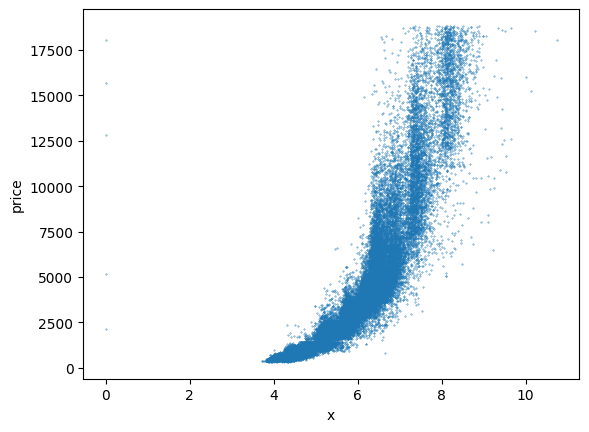

In [61]:
from matplotlib import pyplot as plt

plt.scatter(x_train, y_train, s=0.1)
plt.xlabel("x")
plt.ylabel("price")

In [62]:
import statsmodels.api as sm 

x_constant_train = sm.add_constant(x_train, has_constant="add")
x_constant_train

,const,x
5463,1.0,6.79
13984,1.0,7.02
9681,1.0,6.38
9473,1.0,6.56
37376,1.0,4.70
...,...,...
32399,1.0,4.68
17048,1.0,4.31
23924,1.0,8.08
34086,1.0,4.64


In [63]:
model = sm.OLS(y_train, x_constant_train)
results = model.fit()

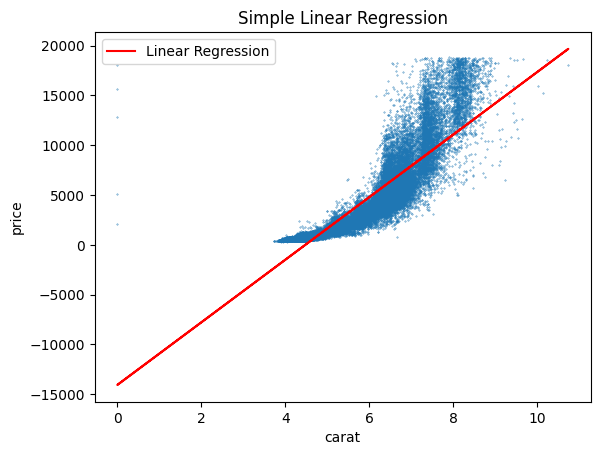

In [64]:
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np

y_train_pred = results.predict(x_constant_train)
plt.scatter(x_train, y_train, s=0.1)
plt.plot(x_train, y_train_pred, color='red', label='Linear Regression')
plt.xlabel('carat')
plt.ylabel('price')
plt.title('Simple Linear Regression')
plt.legend()

In [65]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                 1.555e+05
Date:                Mon, 08 Jan 2024   Prob (F-statistic):               0.00
Time:                        17:37:07   Log-Likelihood:            -3.8597e+05
No. Observations:               43152   AIC:                         7.719e+05
Df Residuals:                   43150   BIC:                         7.720e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.407e+04     46.495   -302.576      0.000   -1.42e+04    -1.4e+04
x           3141.4981      7.967    394.328      0.000    3125.883    3157.113
==============================================================================
Omnibus:                    15435.108   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           128917.243
Skew:                           1.491   Prob(JB):                         0.00
Kurtosis:                      10.925   Cond. No.                         31.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""